In [8]:
'''
Code Author: Spencer Turenne

The data contains information about individual National Football League games for the seasons starting in 1966 until present.
After 1978 all games also include betting spreads.
In other csv files associated with the data you can find information on teams and staidums.

This section contains information about the author and project. It also conatins imports for python libraries.
'''
import pandas
import matplotlib
import matplotlib.pyplot
import numpy

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
scores = pandas.read_csv("spreadspoke_scores.csv")
betting_odds = pandas.DataFrame(data=scores, copy=True)
betting_odds = betting_odds.dropna(subset=betting_odds.columns[:13])
betting_odds = betting_odds.loc[betting_odds['schedule_season'] > 1978]
print(betting_odds.shape)

team_info = pandas.read_csv("nfl_teams.csv")
print(team_info.shape)


for row in betting_odds.index:
    for team in ['team_home', 'team_away']:
        team_row = team_info.loc[team_info['team_name'] == betting_odds.at[row, team]]
        betting_odds.at[row, team] = team_row.at[team_row.index[0], 'team_id']
        
print(betting_odds)


(10445, 17)
(43, 8)
      schedule_date  schedule_season schedule_week  schedule_playoff  \
2501       9/1/1979             1979             1             False   
2502       9/2/1979             1979             1             False   
2503       9/2/1979             1979             1             False   
2504       9/2/1979             1979             1             False   
2505       9/2/1979             1979             1             False   
...             ...              ...           ...               ...   
12941     1/16/2021             2020      Division              True   
12942     1/17/2021             2020      Division              True   
12943     1/17/2021             2020      Division              True   
12944     1/24/2021             2020    Conference              True   
12945     1/24/2021             2020    Conference              True   

      team_home  score_home  score_away team_away team_favorite_id  \
2501         TB        31.0        16.0      

Text(2011, 0.05, 'Mean: 0.57767')

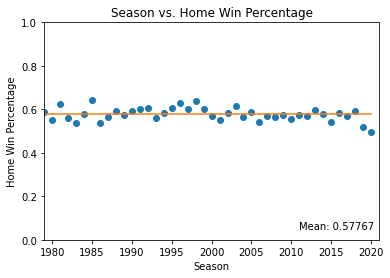

In [5]:
results = {}
for season, home_score, away_score in zip(betting_odds['schedule_season'], betting_odds['score_home'], betting_odds['score_away']):
    if season not in results.keys():
        results[season] = {'home_wins': 0, 'away_wins': 0}
    if home_score > away_score:
        results[season]["home_wins"] += 1
    else:
        results[season]["away_wins"] += 1
        
        
home_win_percent = []
home_win_season = []
for season in results:
    if results[season]["away_wins"] != 0:
        home_win_percent.append(results[season]["home_wins"] / (results[season]["away_wins"] + results[season]['home_wins']))
    home_win_season.append(season)
matplotlib.pyplot.plot(0)
matplotlib.pyplot.scatter(x=home_win_season, y=home_win_percent)
matplotlib.pyplot.xlim(1979, 2021) #Remove pre 1978 because they are not used.
matplotlib.pyplot.ylim(0,1)
matplotlib.pyplot.title("Season vs. Home Win Percentage")
matplotlib.pyplot.xlabel("Season")
matplotlib.pyplot.ylabel("Home Win Percentage")

home_percentage_array = numpy.array(home_win_percent)
matplotlib.pyplot.plot([1978,2020],[home_percentage_array.mean()] * 2)
matplotlib.pyplot.text(2011, .05, f"Mean: {'%.5f'%home_percentage_array.mean()}")

Text(2011, 0.05, 'Mean: 0.64931')

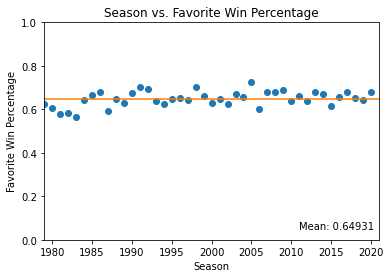

In [7]:
favorite_wins = {}
for season, home_score, away_score, home_team, away_team, favorite in zip(betting_odds['schedule_season'],
                                                                          betting_odds['score_home'],betting_odds['score_away'],
                                                                          betting_odds['team_home'], betting_odds['team_away'],
                                                                          betting_odds['team_favorite_id']):
    if season not in favorite_wins.keys():
        favorite_wins[season] = {'favorite_wins': 0, 'favorite_losses': 0}
    #need to get favorite and see if its home. The home/away_team is "New England Patriots" and favorite is "NE"
    if home_score > away_score and home_team == favorite:
        favorite_wins[season]["favorite_wins"] += 1
    elif away_score > home_score and away_team == favorite:
        favorite_wins[season]["favorite_wins"] += 1
    else:
        favorite_wins[season]["favorite_losses"] += 1


favorite_win_percent = []
favorite_win_season = []
for season in favorite_wins:
    if favorite_wins[season]["favorite_losses"] != 0:
        favorite_win_percent.append(favorite_wins[season]["favorite_wins"] / 
                                (favorite_wins[season]["favorite_losses"] + favorite_wins[season]['favorite_wins']))
    else:
        favorite_win_percent.append(1)
    favorite_win_season.append(season)
    
matplotlib.pyplot.plot(1)
matplotlib.pyplot.scatter(x=favorite_win_season, y=favorite_win_percent)
matplotlib.pyplot.xlim(1979, 2021) #Remove pre 1978 becausae these are not used.
matplotlib.pyplot.ylim(0,1)
matplotlib.pyplot.title("Season vs. Favorite Win Percentage")
matplotlib.pyplot.xlabel("Season")
matplotlib.pyplot.ylabel("Favorite Win Percentage")

favorite_percentage_array = numpy.array(favorite_win_percent)
matplotlib.pyplot.plot([1978,2021],[favorite_percentage_array.mean()] * 2)
matplotlib.pyplot.text(2011, .05, f"Mean: {'%.5f'%favorite_percentage_array.mean()}")

Text(2011, 0.05, 'Mean: 0.67566')

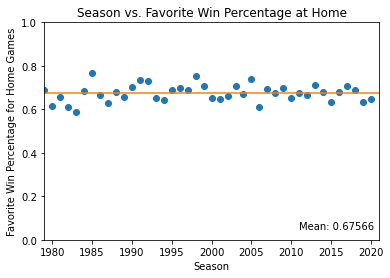

In [5]:
favorite_home_wins = {}
for season, home_score, away_score, home_team, away_team, favorite in zip(betting_odds['schedule_season'],
                                                                          betting_odds['score_home'],betting_odds['score_away'],
                                                                          betting_odds['team_home'], betting_odds['team_away'],
                                                                          betting_odds['team_favorite_id']):
    if season not in favorite_home_wins.keys():
        favorite_home_wins[season] = {'favorite_wins_home': 0, 'favorite_losses_home': 0}
    if home_score > away_score and home_team == favorite:
        favorite_home_wins[season]["favorite_wins_home"] += 1
    elif home_team == favorite:
        favorite_home_wins[season]["favorite_losses_home"] += 1

favorite_home_win_percent = []
favorite_home_win_season = []
for season in favorite_home_wins:
    if favorite_home_wins[season]["favorite_losses_home"] != 0:
        favorite_home_win_percent.append(favorite_home_wins[season]["favorite_wins_home"] / 
                                (favorite_home_wins[season]["favorite_losses_home"] + 
                                 favorite_home_wins[season]['favorite_wins_home']))
    else:
        favorite_home_win_percent.append(1)
    favorite_home_win_season.append(season)
    
matplotlib.pyplot.plot(2)
matplotlib.pyplot.scatter(x=favorite_home_win_season, y=favorite_home_win_percent)
matplotlib.pyplot.xlim(1979, 2021) #Remove pre 1978 becausae these are not used.
matplotlib.pyplot.ylim(0,1)
matplotlib.pyplot.title("Season vs. Favorite Win Percentage at Home")
matplotlib.pyplot.xlabel("Season")
matplotlib.pyplot.ylabel("Favorite Win Percentage for Home Games")

favorite_home_percentage_array = numpy.array(favorite_home_win_percent)
matplotlib.pyplot.plot([1978,2021],[favorite_home_percentage_array.mean()] * 2)
matplotlib.pyplot.text(2011, .05, f"Mean: {'%.5f'%favorite_home_percentage_array.mean()}")

{1979: {'favorite_wins_away': 42, 'favorite_losses_away': 31}, 1980: {'favorite_wins_away': 44, 'favorite_losses_away': 29}, 1981: {'favorite_wins_away': 31, 'favorite_losses_away': 36}, 1982: {'favorite_wins_away': 21, 'favorite_losses_away': 16}, 1983: {'favorite_wins_away': 38, 'favorite_losses_away': 26}, 1984: {'favorite_wins_away': 46, 'favorite_losses_away': 28}, 1985: {'favorite_wins_away': 45, 'favorite_losses_away': 35}, 1986: {'favorite_wins_away': 55, 'favorite_losses_away': 20}, 1987: {'favorite_wins_away': 29, 'favorite_losses_away': 23}, 1988: {'favorite_wins_away': 38, 'favorite_losses_away': 22}, 1989: {'favorite_wins_away': 43, 'favorite_losses_away': 29}, 1990: {'favorite_wins_away': 46, 'favorite_losses_away': 24}, 1991: {'favorite_wins_away': 53, 'favorite_losses_away': 28}, 1992: {'favorite_wins_away': 50, 'favorite_losses_away': 26}, 1993: {'favorite_wins_away': 45, 'favorite_losses_away': 26}, 1994: {'favorite_wins_away': 35, 'favorite_losses_away': 24}, 1995: {

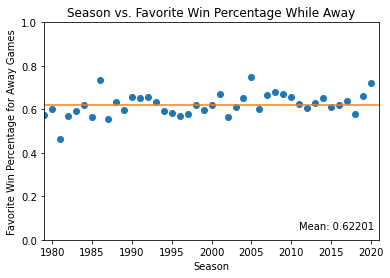

In [6]:
favorite_away_wins = {}
for season, home_score, away_score, home_team, away_team, favorite in zip(betting_odds['schedule_season'],
                                                                          betting_odds['score_home'],betting_odds['score_away'],
                                                                          betting_odds['team_home'], betting_odds['team_away'],
                                                                          betting_odds['team_favorite_id']):
    if season not in favorite_away_wins.keys():
        favorite_away_wins[season] = {'favorite_wins_away': 0, 'favorite_losses_away': 0}
    if away_score > home_score and away_team == favorite:
        favorite_away_wins[season]["favorite_wins_away"] += 1
    elif away_team == favorite:
        favorite_away_wins[season]["favorite_losses_away"] += 1

favorite_away_win_percent = []
favorite_away_win_season = []
for season in favorite_away_wins:
    if favorite_away_wins[season]["favorite_losses_away"] != 0:
        favorite_away_win_percent.append(favorite_away_wins[season]["favorite_wins_away"] / 
                                (favorite_away_wins[season]["favorite_losses_away"] + 
                                 favorite_away_wins[season]['favorite_wins_away']))
    else:
        favorite_away_win_percent.append(1)
    favorite_away_win_season.append(season)
    
matplotlib.pyplot.plot(3)
matplotlib.pyplot.scatter(x=favorite_away_win_season, y=favorite_away_win_percent)
matplotlib.pyplot.xlim(1979, 2021) #Remove pre 1978 becausae these are not used.
matplotlib.pyplot.ylim(0,1)
matplotlib.pyplot.title("Season vs. Favorite Win Percentage While Away")
matplotlib.pyplot.xlabel("Season")
matplotlib.pyplot.ylabel("Favorite Win Percentage for Away Games")

favorite_away_percentage_array = numpy.array(favorite_away_win_percent)
matplotlib.pyplot.plot([1978,2021],[favorite_away_percentage_array.mean()] * 2)
matplotlib.pyplot.text(2011, .05, f"Mean: {'%.5f'%favorite_away_percentage_array.mean()}")
print(favorite_away_wins)

Text(1, 0.85, 'Outside 75th percentile')

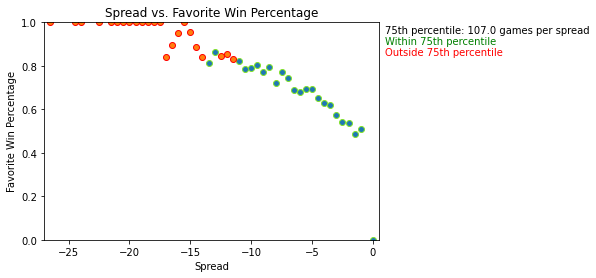

In [11]:
spread_favorite_wins = {}
spread_favorite_counts = {}
for home_score, away_score, home_team, away_team, favorite, spread in zip(betting_odds['score_home'],
                                                                          betting_odds['score_away'],betting_odds['team_home'],
                                                                          betting_odds['team_away'],
                                                                          betting_odds['team_favorite_id'],
                                                                          betting_odds['spread_favorite']):
    if spread not in spread_favorite_wins.keys():
        spread_favorite_wins[spread] = {'favorite_spread_wins': 0, 'favorite_spread_losses': 0}
        spread_favorite_counts[spread] = 0
    spread_favorite_counts[spread] += 1
    if home_score > away_score and home_team == favorite:
        spread_favorite_wins[spread]['favorite_spread_wins'] += 1
    elif away_score > home_score and away_team == favorite:
        spread_favorite_wins[spread]['favorite_spread_wins'] += 1
    else:
        spread_favorite_wins[spread]['favorite_spread_losses'] += 1
        
favorite_spread_wins_percentage = []
favorite_spreads = []
for spread in spread_favorite_wins:
    if spread_favorite_wins[spread]['favorite_spread_losses'] != 0:
             favorite_spread_wins_percentage.append(spread_favorite_wins[spread]["favorite_spread_wins"] / 
                                (spread_favorite_wins[spread]["favorite_spread_losses"] + 
                                 spread_favorite_wins[spread]['favorite_spread_wins']))
    else:
        favorite_spread_wins_percentage.append(1)
    favorite_spreads.append(spread)
    
matplotlib.pyplot.plot(4)
#matplotlib.pyplot.scatter(x=favorite_spreads, y=favorite_spread_wins_percentage, edgecolors='r')
matplotlib.pyplot.xlim(-27, .5) #Remove pre 1978 becausae these are not used.
matplotlib.pyplot.ylim(0,1)
matplotlib.pyplot.title("Spread vs. Favorite Win Percentage")
matplotlib.pyplot.xlabel("Spread")
matplotlib.pyplot.ylabel("Favorite Win Percentage")


favorite_spread_wins_percentage_array = numpy.array(favorite_spread_wins_percentage)
percentile = numpy.percentile(list(spread_favorite_counts.values()), 50)


in_percentile_spread_wins_percentage = []
in_percentile_favorite_spreads = []
out_percentile_spread_wins_percentage = []
out_percentile_favorite_spreads = []
for spread in spread_favorite_counts:
    if spread_favorite_counts[spread] < percentile:
        out_percentile_favorite_spreads.append(spread)
        if spread_favorite_wins[spread]['favorite_spread_losses'] != 0:
             out_percentile_spread_wins_percentage.append(spread_favorite_wins[spread]["favorite_spread_wins"] / 
                                (spread_favorite_wins[spread]["favorite_spread_losses"] + 
                                 spread_favorite_wins[spread]['favorite_spread_wins']))
        else:
            out_percentile_spread_wins_percentage.append(1)
    else:
        in_percentile_favorite_spreads.append(spread)
        if spread_favorite_wins[spread]['favorite_spread_losses'] != 0:
             in_percentile_spread_wins_percentage.append(spread_favorite_wins[spread]["favorite_spread_wins"] / 
                                (spread_favorite_wins[spread]["favorite_spread_losses"] + 
                                 spread_favorite_wins[spread]['favorite_spread_wins']))
        else:
            in_percentile_spread_wins_percentage.append(1)
            
matplotlib.pyplot.scatter(x=in_percentile_favorite_spreads, y=in_percentile_spread_wins_percentage, edgecolors='#83e22b')
matplotlib.pyplot.scatter(x=out_percentile_favorite_spreads, y=out_percentile_spread_wins_percentage, edgecolors='r')
matplotlib.pyplot.text(1, .95, f"75th percentile: {percentile} games per spread")
matplotlib.pyplot.text(1, .9, "Within 75th percentile", color='g')
matplotlib.pyplot.text(1, .85, "Outside 75th percentile", color='r')